In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## 12.3.1 데이터 탐색 수행

In [ ]:
# pandas 사용하여 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/BK21/data/metro_interstate_traffic_volume_preprocessed.csv')
df.shape

(17551, 6)

In [ ]:
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


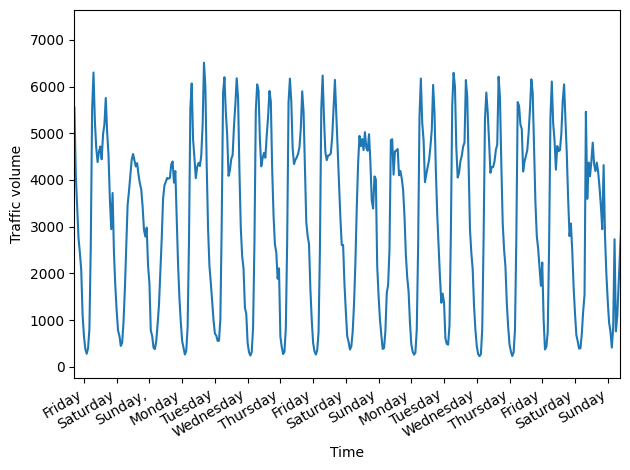

In [ ]:
# 2주분량의 데이터 도식화
# 시간 경과에 따른 교통량의 변화

fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday,',
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday',
                                   'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

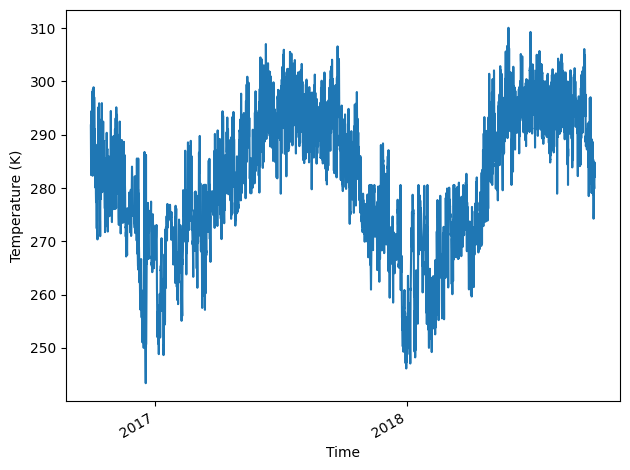

In [ ]:
# 다중 출력 모델의 대상이 될, 시간별 기온 도식화

fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')
plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

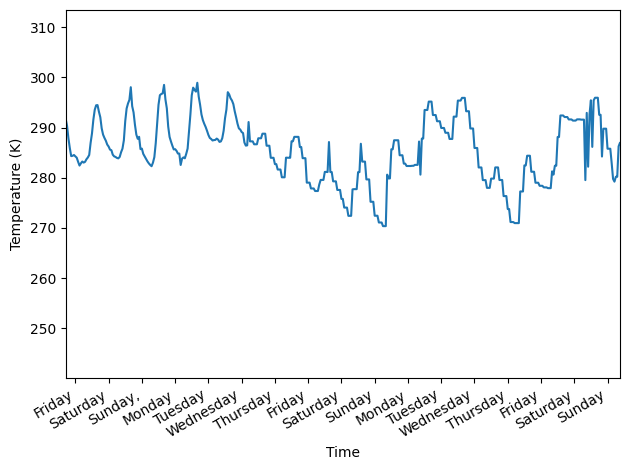

In [ ]:
# 기온의 일별 계절성 관찰

fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday,',
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday',
                                   'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

## 12.3.2 특징 엔지니어링과 데이터 분할

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


In [ ]:
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis = 1)

In [ ]:
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

In [ ]:
day = 24 * 60 * 60 # 타임스탬프는 초 단위이므로, 사인 변환 적용 전 하루의 초 수 계산
df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values # 사인변환 적용 - 사인함수에선 radian 사용하는 점 유의

In [ ]:
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values # 초 단위인 타임스탬프에 코사인 변환 적용
df = df.drop(['date_time'], axis=1) #date_time 열 삭제

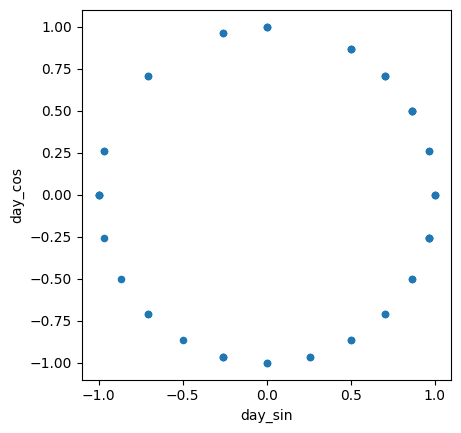

In [ ]:
# day_sin 및 day_cos 샘플 도식화하여 변환이 적절한지 확인
df.sample(50).plot.scatter('day_sin', 'day_cos').set_aspect('equal');

In [ ]:
n = len(df)

# 데이터 분할 70:20:10 (훈련:검증:테스트 집합)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

<ipython-input-16-55571345feeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
<ipython-input-16-55571345feeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
<ipython-input-16-55571345feeb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
train_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/traffic_train_df.csv')
val_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/traffic_val_df.csv')
test_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/traffic_test_df.csv')

# 12.5 연습

### 1. 데이터 로딩

In [ ]:
# pandas 사용하여 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/BK21/data/beijing_air_quality.csv')
df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,16151,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.0,SW,0.7,Aotizhongxin,2015-01-02 22:00:00
1,16152,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.0,NNW,0.7,Aotizhongxin,2015-01-02 23:00:00
2,16153,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.0,SSE,0.4,Aotizhongxin,2015-01-03 00:00:00
3,16154,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.0,ESE,0.4,Aotizhongxin,2015-01-03 01:00:00
4,16155,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,0.0,NE,1.1,Aotizhongxin,2015-01-03 02:00:00


### 2. 대상 도식화

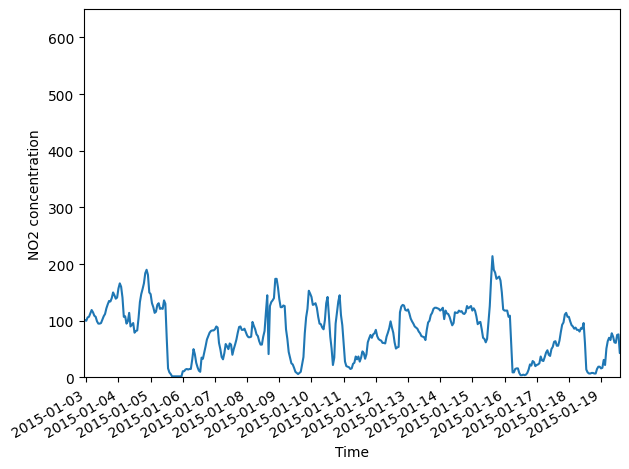

In [ ]:
#이산화질소 농도 예측

fig, ax = plt.subplots()

ax.plot(df['NO2'])
ax.set_xlabel('Time')
ax.set_ylabel('NO2 concentration')
plt.xticks(np.arange(2, 400, 24), ['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19'])
plt.ylim(0, 650)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

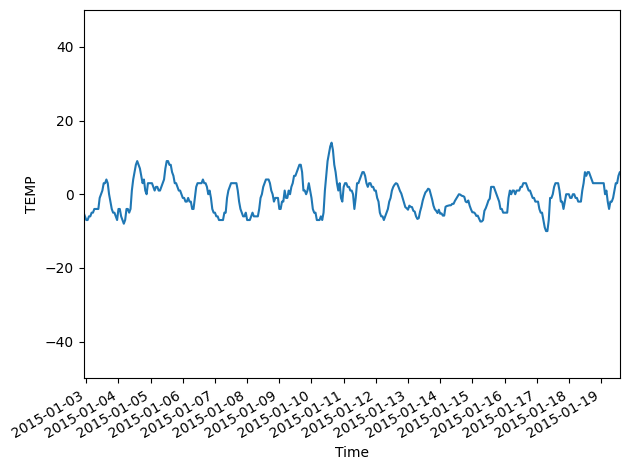

In [ ]:
#온도 예측

fig, ax = plt.subplots()

ax.plot(df['TEMP'])
ax.set_xlabel('Time')
ax.set_ylabel('TEMP')
plt.xticks(np.arange(2, 400, 24), ['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19'])
plt.ylim(-50, 50)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

### 3. 불필요한 열 제거

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,18914.0,25607.500000,5460.145831,16151.0,20879.250,25607.5,30335.75,35064.0
PM2.5,18914.0,79.407220,83.816615,3.0,19.000,54.0,107.00,898.0
PM10,18914.0,103.687485,95.725767,3.0,33.225,78.0,143.00,984.0
SO2,18914.0,13.201725,17.090182,2.0,2.000,7.0,16.00,341.0
NO2,18914.0,55.560272,37.834273,2.0,26.000,47.0,77.00,290.0
CO,18914.0,1324.737573,1351.213878,100.0,500.000,900.0,1600.00,10000.0
O3,18914.0,61.602319,58.980450,2.0,13.000,49.0,87.00,423.0
TEMP,18914.0,12.741331,11.751367,-16.8,2.000,13.0,23.10,38.8
PRES,18914.0,1013.480721,10.470266,987.5,1004.900,1013.2,1022.10,1042.0
DEWP,18914.0,1.399363,13.830859,-35.3,-10.100,1.3,14.00,27.3


In [ ]:
cols_to_drop = ['No','RAIN', 'station', 'wd']
df = df.drop(cols_to_drop, axis = 1)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,datetime
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7,2015-01-02 22:00:00
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7,2015-01-02 23:00:00
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4,2015-01-03 00:00:00
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4,2015-01-03 01:00:00
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1,2015-01-03 02:00:00


### 4. 일별 계절성이 있는지 확인하고 그에 따라 시간을 인코딩한다

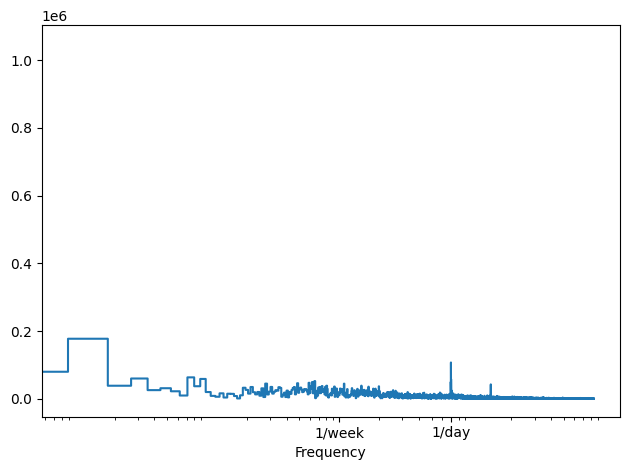

In [ ]:
# 일별 계절성 확인
timestamp_s = pd.to_datetime(df.datetime).map(datetime.datetime.timestamp) #

fft = tf.signal.rfft(df['NO2'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['NO2'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#  시간 인코딩
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

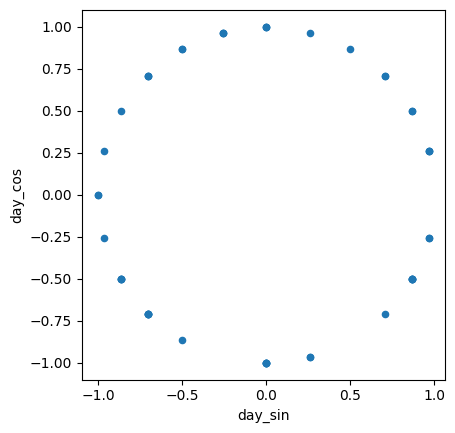

In [ ]:
df.sample(50).plot.scatter('day_sin', 'day_cos').set_aspect('equal');

In [ ]:
df = df.drop(['datetime'], axis=1)

df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,day_sin,day_cos
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7,-5.000000e-01,0.866025
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7,-2.588190e-01,0.965926
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4,-4.722481e-12,1.000000
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4,2.588190e-01,0.965926
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1,5.000000e-01,0.866025


### 5. 데이터를 훈련/검증/테스트 집합으로 분할

In [ ]:
n = len(df)

# 데이터 분할 70:20:10 (훈련:검증:테스트 집합)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

### 6. MinMaxScaler 사용하여 데이터를 스케일링

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

<ipython-input-28-55571345feeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
<ipython-input-28-55571345feeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
<ipython-input-28-55571345feeb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

### 7. 나중에 사용할 훈련/검증/테스트집합 파일로 저장

In [ ]:
train_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/bejing_airquality_train_df.csv')
val_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/bejing_airquality_val_df.csv')
test_df.to_csv('/content/drive/MyDrive/BK21/수정/시계열 실습/data/bejing_airquality_test_df.csv')